In [3]:
import sys
if "../.." not in sys.path: sys.path.insert(0, "../..")
if ".." not in sys.path: sys.path.insert(0, "..")
from os import path
import tempfile

import numpy as np
import scipy
from scipy.spatial.transform import Rotation as R
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import imageio
import seaborn as sns

from experiment.v1dd_em_client import V1DDEMClient
import analysis_tools as at

at.set_stylesheet()

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
em_client = V1DDEMClient()

/opt/anaconda3/envs/v1dd/lib/python3.10/site-packages/standard_transform/datasets.py:21: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  rot, _ = R.align_vectors(np.array([[0, 1, 0]]), [up])


In [4]:
corresponded = em_client.get_2p_corresponded_table()

In [5]:
corresponded_den_proof = corresponded[corresponded.dendrite_proofreading_status.isin(V1DDEMClient.PROOFREADING_STATUS_COMPLETE)]
print(len(corresponded_den_proof))
corresponded_den_proof

19


,index,id,valid,classification_system,cell_type,pt_supervoxel_id,pt_root_id,pt_position,roi_lookup,position_microns,axon_proofreading_status,dendrite_proofreading_status
3,3,95,t,session13,plane4_0119,91070624654826905,864691132741334425,"[84428, 70297, 5418]",1-3-5-119,"[-147.1008040492488, 397.2344828991529, -345.9...",not_started,ariadne_qa
10,10,88,t,session13,plane1_0075,93392105950991300,864691132630689122,"[93706, 67632, 5059]",1-3-2-75,"[-63.736396272770016, 369.3849977790961, -355....",not_started,allen_qa
14,14,48,t,session13,plane2_roi_0025,94235843954739595,864691132835126165,"[97048, 64977, 7072]",1-3-3-25,"[-33.65266860667232, 370.4608009240667, -261.4...",not_started,allen_qa
15,15,49,t,session13,plane2_roi_0074,92055374622340898,864691132598347327,"[88461, 68719, 4404]",1-3-3-74,"[-110.93316641399136, 371.15582529042194, -386...",not_started,allen_qa
16,16,50,t,session13,plane0_roi_0065,91421093919056079,864691132621003707,"[86003, 64732, 4886]",1-3-1-65,"[-133.19808602945076, 342.4989722512487, -355....",in_progress,allen_qa
17,17,103,t,session13,plane3_0089,93393411553455652,864691132827688129,"[93499, 72719, 4155]",1-3-4-89,"[-65.43400252395776, 402.61649847251164, -406....",not_started,allen_qa
18,18,101,t,session13,plane2_0191,93110699693734118,864691132678493470,"[92585, 67831, 5022]",1-3-3-191,"[-73.81890019900177, 370.71513983959437, -357....",not_started,allen_qa
19,19,105,t,session13,plane4_0109,93321943633527277,864691132656860120,"[93318, 68348, 6990]",1-3-5-109,"[-67.08166382155882, 398.8715816165777, -273.1...",not_started,allen_qa
23,23,60,t,session13,plane1_roi_0026,93251368462113682,864691132924264745,"[93107, 67702, 4644]",1-3-2-26,"[-69.14919163411437, 365.0198245600475, -373.2...",not_started,allen_qa
24,24,104,t,session13,plane3_0306,92547543850425640,864691132721900430,"[90343, 67037, 7181]",1-3-4-306,"[-93.90146758848941, 389.9373440435976, -261.6...",not_started,allen_qa


In [11]:
cell_types = em_client.get_cell_type_table()
cell_types.head()

,index,id,valid,target_id,classification_system,cell_type,id_ref,valid__ref,volume,pt_supervoxel_id,pt_root_id,pt_position,bb_start_position,bb_end_position,position_microns,axon_proofreading_status,dendrite_proofreading_status
0,0,1132,t,350562,coarse_manual,PYC,350562,t,326.965400,94866276031228266,864691132773514104,"[894573, 478559, 163530]","[891003, 473981, 17111]","[898608, 483370, 18134]","[-13.227572489957907, 226.5862979342913, -382....",not_started,not_started
1,1,214,t,383955,coarse_manual,PYC,383955,t,504.192300,95649060060623076,864691132569667100,"[920802, 795478, 329220]","[914826, 790822, 34920]","[926389, 800366, 36123]","[14.741818935006158, 576.1578669978572, -307.2...",not_started,not_started
2,2,13,t,385028,coarse_manual,PYC,385028,t,415.785065,95863052645657911,864691132781402571,"[929338, 898530, 386595]","[924914, 892245, 41162]","[933994, 903885, 42103]","[23.848399659480666, 690.7637364002102, -279.5...",not_started,not_started
3,3,717,t,293764,coarse_manual,PYC,293764,t,231.369357,94450111081742956,864691132625300120,"[878665, 697702, 245475]","[874009, 694365, 26030]","[883554, 701349, 26859]","[-27.97517873296875, 459.74380331495826, -361....",not_started,not_started
4,4,2604,t,351373,coarse_manual,PYC,351373,t,277.321739,96276193669654108,864691132689074198,"[944314, 572378, 210330]","[939814, 568187, 22179]","[948505, 576413, 23110]","[37.02512562261708, 329.260361441734, -362.108...",not_started,not_started


In [30]:
cell_type_map = pd.Series(index=cell_types.pt_root_id.values, data=cell_types.cell_type.values)
cell_type_map

864691132773514104    PYC
864691132569667100    PYC
864691132781402571    PYC
864691132625300120    PYC
864691132689074198    PYC
                     ... 
864691132653436140    PYC
864691132735829608     BC
864691132653866455    PYC
864691132617158087    PYC
864691132762899335    PYC
Length: 3760, dtype: object

## Cell types of presynaptic cells

In [9]:
# Load the presynaptic synapses
den_syn = em_client.get_dendritic_synapses(corresponded_den_proof.pt_root_id)

In [40]:
for x, y in cell_type_map[den_syn.pre_pt_root_id[den_syn.pre_pt_root_id.isin(cell_type_map.index)]].value_counts().items():
    print(x, y)

BC 1298
MC 1221
PYC 431
Unsure I 195
Non-neuronal 83
BPC 48
NGC 10


In [43]:
presyn_cell_type_counts = pd.DataFrame(index=corresponded_den_proof.pt_root_id, columns=["PYC", "MC", "BC", "BPC", "Other", "Unlabeled", "Out of Volume"], data=0)

for root_id in corresponded_den_proof.pt_root_id.values:
    syn = den_syn[den_syn.post_pt_root_id == root_id]
    no_soma = syn.pre_soma_position.isna()
    presyn_cell_type_counts.at[root_id, "Out of Volume"] = no_soma.sum()
    pre_root_ids = syn.pre_pt_root_id.values[~no_soma]
    has_type = np.isin(pre_root_ids, cell_type_map.index)
    presyn_cell_type_counts.at[root_id, "Unlabeled"] = (~has_type).sum()
    pre_root_ids = pre_root_ids[has_type]
    pre_types = cell_type_map[pre_root_ids]
    n_other = 0
    
    for cell_type, count in pre_types.value_counts().items():
        if cell_type in presyn_cell_type_counts.columns:
            presyn_cell_type_counts.at[root_id, cell_type] = count
        else:
            n_other += count

    presyn_cell_type_counts.at[root_id, "Other"] = n_other

presyn_cell_type_counts

,PYC,MC,BC,BPC,Other,Unlabeled,Out of Volume
pt_root_id,,,,,,,
864691132741334425,16,63,79,1,16,178,2196
864691132630689122,20,69,74,1,8,100,2503
864691132835126165,22,63,53,1,10,137,2424
864691132598347327,34,41,64,0,14,119,2971
864691132621003707,19,74,55,5,27,159,3288
864691132827688129,16,51,48,1,8,78,1676
864691132678493470,19,53,70,0,11,91,2012
864691132656860120,30,72,77,2,13,139,2613
864691132924264745,23,102,111,1,20,127,3550


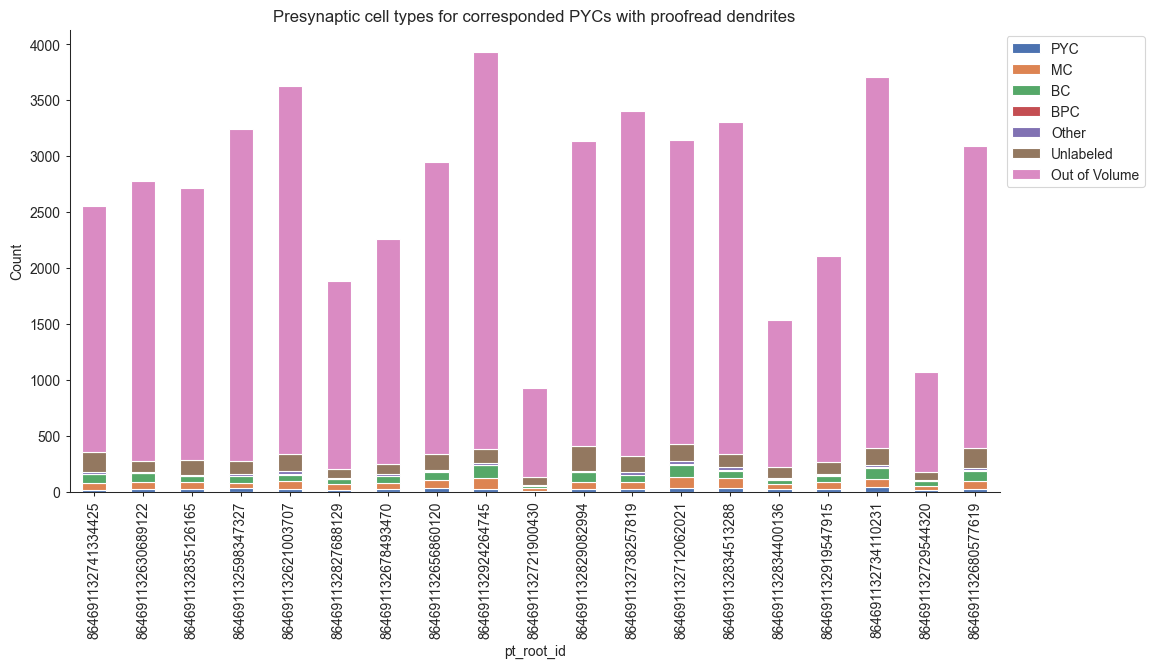

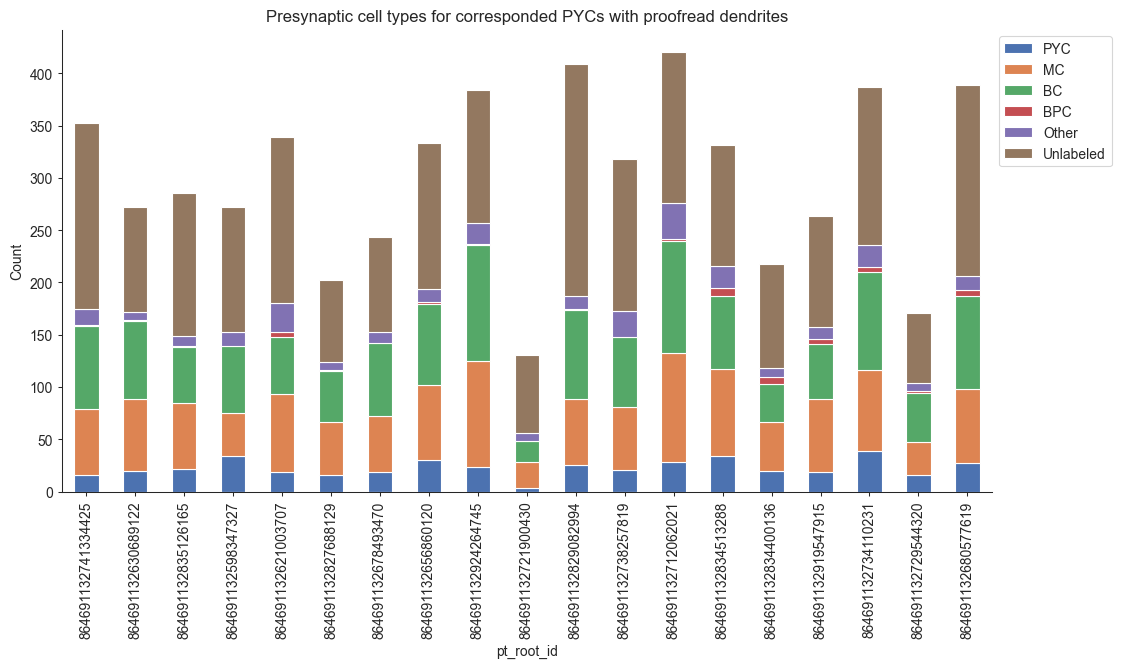

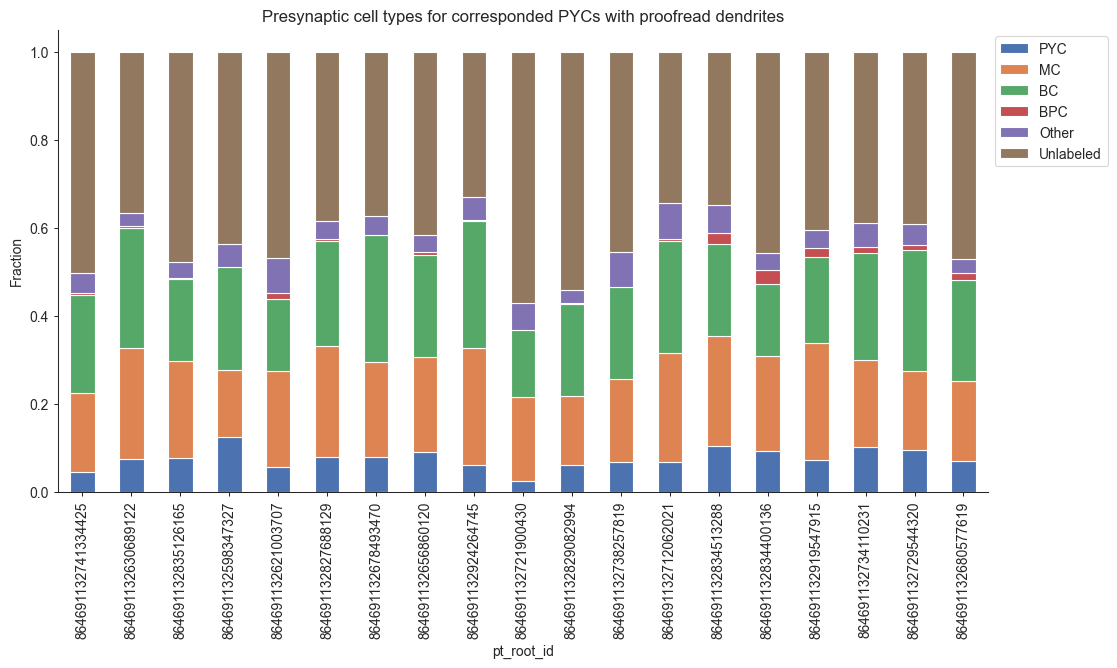

In [73]:
ax = presyn_cell_type_counts.plot(kind="bar", stacked=True, figsize=(12, 6))
ax.set_title("Presynaptic cell types for corresponded PYCs with proofread dendrites")
ax.set_ylabel("Count")
ax.get_legend().set_bbox_to_anchor((1, 1), transform=ax.transAxes)

presyn_cell_type_counts_in_em = presyn_cell_type_counts[presyn_cell_type_counts.columns[:-1]]
ax = presyn_cell_type_counts_in_em.plot(kind="bar", stacked=True, figsize=(12, 6))
ax.set_title("Presynaptic cell types for corresponded PYCs with proofread dendrites")
ax.set_ylabel("Count")
ax.get_legend().set_bbox_to_anchor((1, 1), transform=ax.transAxes)


ax = presyn_cell_type_counts_in_em.divide(presyn_cell_type_counts_in_em.sum(axis=1), axis=0).plot(kind="bar", stacked=True, figsize=(12, 6), )
ax.set_title("Presynaptic cell types for corresponded PYCs with proofread dendrites")
ax.set_ylabel("Fraction")
ax.get_legend().set_bbox_to_anchor((1, 1), transform=ax.transAxes)

## Load metrics

In [97]:
metrics = pd.read_csv("/Users/chase/Desktop/MindScope/Documents/v1dd-chase/dataframes/v1dd_metrics.csv", index_col=0, low_memory=False)
# metrics = metrics[metrics.is_valid & (metrics.mouse == 409828) & (metrics.column == 1) & ~metrics.is_ignored_duplicate]

# Insert new metrics columns for analysis
metrics["volume"] = metrics["volume"].apply(at.try_parse_int)
metrics["depth_chunk"] = metrics.apply(lambda row: min(int(np.floor((row.depth - 50) / 48)), 10), axis=1) # 50 is shallowest depth; 48 is size of chunk; deeper chunks go to 10
metrics["vol_plane"] = metrics.apply(lambda row: f"{row.volume}-{row.plane}", axis=1)

metrics["dgw_is_responsive"] = metrics.dgw_frac_responsive_trials >= 0.5
metrics["dgf_is_responsive"] = metrics.dgf_frac_responsive_trials >= 0.5

from stimulus_analysis import fit_utils

metrics["ssi_fit"] = fit_utils.compute_dg_fit_ssi_from_metrics(metrics)
metrics["dgw_pref_dir_fit"] = fit_utils.get_dg_pref_dir(metrics, "dgw")
metrics["dgf_pref_dir_fit"] = fit_utils.get_dg_pref_dir(metrics, "dgf")

metrics["pt_root_id"] = pd.NA

for _, row in corresponded.iterrows():
    col, vol, plane, roi = row["roi_lookup"].split("-")
    metrics.at[f"M409828_{col}{vol}_{plane}_{roi}", "pt_root_id"] = row["pt_root_id"]

In [111]:
metrics

,mouse,column,volume,plane,roi,is_valid,is_ignored_duplicate,has_duplicate,n_duplicates,duplicate_rois,...,spontaneous_event_mean,spontaneous_event_std,depth_chunk,vol_plane,dgw_is_responsive,dgf_is_responsive,ssi_fit,dgw_pref_dir_fit,dgf_pref_dir_fit,pt_root_id
M409828_11_1_0,409828,1,1,1,0,False,False,False,0,NaN,...,0.000337,0.001891,0,1-1,False,False,NaN,NaN,NaN,NaN
M409828_11_1_1,409828,1,1,1,1,False,False,False,0,NaN,...,0.000566,0.003059,0,1-1,False,False,NaN,NaN,NaN,NaN
M409828_11_1_2,409828,1,1,1,2,False,False,False,0,NaN,...,0.000431,0.002470,0,1-1,False,False,NaN,NaN,NaN,NaN
M409828_11_1_3,409828,1,1,1,3,False,False,False,0,NaN,...,0.000416,0.002300,0,1-1,False,False,NaN,NaN,NaN,NaN
M409828_11_1_4,409828,1,1,1,4,False,False,False,0,NaN,...,0.000484,0.002612,0,1-1,False,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M409828_1f_1_1186,409828,1,f,1,1186,False,False,False,0,NaN,...,0.002203,0.012454,10,f-1,False,False,NaN,NaN,NaN,NaN
M409828_1f_1_1187,409828,1,f,1,1187,False,False,False,0,NaN,...,0.024832,0.106390,10,f-1,False,False,NaN,NaN,NaN,NaN
M409828_1f_1_1188,409828,1,f,1,1188,False,False,False,0,NaN,...,0.005677,0.030749,10,f-1,False,False,NaN,NaN,NaN,NaN
M409828_1f_1_1189,409828,1,f,1,1189,False,False,False,0,NaN,...,0.003554,0.019777,10,f-1,False,False,NaN,NaN,NaN,NaN


In [120]:
# plane2_294, plane3_0325
metrics.loc[f"M409828_13_3_294"].ssi, metrics.loc[f"M409828_13_4_325"].ssi

False

In [94]:
em_client.query_table("correspondance_pilot")

,id,valid,classification_system,cell_type,pt_supervoxel_id,pt_root_id,pt_position
0,90,t,session13,plane2_014,92055099945608124,864691132710145793,"[88274, 67650, 5900]"
1,55,t,session13,plane0_roi_0060,93180175218572599,864691132760377194,"[92791, 64340, 5745]"
2,43,t,session13,plane1_roi_0030,91843650048621008,864691132720617684,"[87483, 66110, 5411]"
3,95,t,session13,plane4_0119,91070624654826905,864691132741334425,"[84428, 70297, 5418]"
4,96,t,session13,plane1_0271,92547337557612090,864691132771662867,"[90300, 66348, 6009]"
5,37,t,session13,plane2_roi_0269,93109944114777440,864691132807412738,"[92493, 64925, 7372]"
6,94,t,session13,plane1_0262,95573468367740795,864691132573738810,"[102044, 67460, 5245]"
7,39,t,session13,plane2_roi_0158,95150912506684625,864691132594653239,"[100608, 65812, 6828]"
8,40,t,session13,plane2_roi_0230,94658606108307469,864691133065754585,"[98584, 67037, 6372]"
9,87,t,session13,plane0_0088,94166024496769248,864691132630689634,"[96758, 67089, 3591]"


In [95]:
metrics

,mouse,column,volume,plane,roi,is_valid,is_ignored_duplicate,has_duplicate,n_duplicates,duplicate_rois,...,spontaneous_event_mean,spontaneous_event_std,depth_chunk,vol_plane,dgw_is_responsive,dgf_is_responsive,ssi_fit,dgw_pref_dir_fit,dgf_pref_dir_fit,pt_root_id
M409828_11_1_89,409828.0,1.0,1,1.0,89.0,True,False,False,0.0,NaN,...,0.000287,0.001903,0.0,1-1,False,False,0.173092,351.613700,63.683119,NaN
M409828_11_2_0,409828.0,1.0,1,2.0,0.0,True,False,False,0.0,NaN,...,0.000346,0.002629,0.0,1-2,False,False,-0.076999,46.319837,71.813432,NaN
M409828_11_2_1,409828.0,1.0,1,2.0,1.0,True,False,False,0.0,NaN,...,0.000341,0.002262,0.0,1-2,True,True,-0.357757,20.629574,14.344481,NaN
M409828_11_2_2,409828.0,1.0,1,2.0,2.0,True,False,False,0.0,NaN,...,0.000341,0.002412,0.0,1-2,True,True,0.238414,360.000000,63.556494,NaN
M409828_11_2_4,409828.0,1.0,1,2.0,4.0,True,False,False,0.0,NaN,...,0.000234,0.001601,0.0,1-2,False,False,-0.131294,349.940152,323.599541,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M409828_13_4_387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,864691132853487363
M409828_13_4_212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,864691132734110231
M409828_13_5_419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,864691132734110999
M409828_13_3_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,864691132687688330


In [83]:
metrics_em = metrics[~metrics.pt_root_id.isna()].set_index("pt_root_id")
metrics_em

,mouse,column,volume,plane,roi,is_valid,is_ignored_duplicate,has_duplicate,n_duplicates,duplicate_rois,...,ffsi_all_dirs,spontaneous_event_mean,spontaneous_event_std,depth_chunk,vol_plane,dgw_is_responsive,dgf_is_responsive,ssi_fit,dgw_pref_dir_fit,dgf_pref_dir_fit
pt_root_id,,,,,,,,,,,,,,,,,,,,,
864691132828579121,409828.0,1.0,3,1.0,40.0,True,False,True,2.0,M409828_13_2_255,...,"[-0.42307016, 0.35830808, 0.68878716, -0.56922...",0.000980,0.007573,4.0,3-1,False,False,0.296540,236.617887,1.228638e+02
864691132760377194,409828.0,1.0,3,1.0,60.0,True,False,False,0.0,NaN,...,"[0.4801694, 0.6396076, 0.054009557, 0.56301165...",0.000568,0.003893,4.0,3-1,False,False,0.303960,352.198320,1.036740e-26
864691132621003707,409828.0,1.0,3,1.0,65.0,True,False,False,0.0,NaN,...,"[-0.16928723, 1.0, 1.0, -2.3791614, 1.0, 0.783...",0.000544,0.003402,4.0,3-1,False,False,0.480759,60.509807,3.077618e+02
864691132680560211,409828.0,1.0,3,1.0,67.0,True,False,False,0.0,NaN,...,"[0.4583368, 0.5927083, 0.5449947, 0.08486982, ...",0.000770,0.005534,4.0,3-1,False,False,0.645280,238.727585,2.424361e+02
864691132630689634,409828.0,1.0,3,1.0,88.0,True,False,False,0.0,NaN,...,"[-2.22307, 0.8203237, -0.6990151, -1.2991363, ...",0.000411,0.002847,4.0,3-1,False,False,-0.117431,333.555659,9.629656e+00
864691132827688641,409828.0,1.0,3,1.0,117.0,True,False,False,0.0,NaN,...,"[-0.029119255, 0.2975542, -0.48278296, -0.7792...",0.001582,0.013035,4.0,3-1,False,False,0.813327,334.188082,3.076254e+02
864691132851739966,409828.0,1.0,3,1.0,209.0,True,False,False,0.0,NaN,...,"[0.37715483, 0.43447813, 0.17575274, -4.978860...",0.000660,0.003959,4.0,3-1,False,False,0.397205,146.664259,1.060012e+02
864691132939614942,409828.0,1.0,3,1.0,671.0,True,False,False,0.0,NaN,...,"[-0.90815294, 0.65614074, 0.3656253, 0.6153964...",0.000625,0.004124,4.0,3-1,False,False,0.475302,186.143714,3.865075e-03
864691132951373898,409828.0,1.0,3,2.0,5.0,True,False,True,2.0,M409828_13_3_302,...,"[-1.6810939, 0.4373876, -0.26547897, -4.112402...",0.001066,0.008248,4.0,3-2,False,False,0.348054,314.695420,1.489581e+02
